In [3]:
import numpy as np
import pyod as po
from pyod.models.knn import KNN
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, roc_curve, RocCurveDisplay
from scipy.stats import zscore

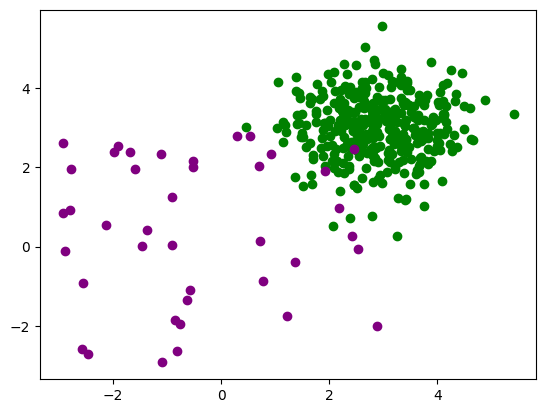

In [4]:
#ex1
x_train, x_test, y_train, y_test = po.utils.data.generate_data(n_train=400, n_test=100,
                                                               n_features=2, contamination=0.1,
                                                               random_state = 67)
plt.scatter(x_train[:360,0],x_train[:360,1],color="green")
plt.scatter(x_train[360:,0],x_train[360:,1],color="purple")

In [5]:
#ex2
knn = KNN()
knn.fit(x_train)

test_predict = knn.predict(x_test)

labels = knn.labels_
cfmatrix1 = sk.metrics.confusion_matrix(y_train,labels)
cfmatrix2 = sk.metrics.confusion_matrix(y_test,test_predict)
#print(cfmatrix2)

tpr = cfmatrix2[0,0]/(cfmatrix2[0,0]+cfmatrix2[0,1])
tnr = cfmatrix2[1,1]/(cfmatrix2[1,1]+cfmatrix2[1,0])
print((tpr+tnr)/2)

tpr = cfmatrix1[0,0]/(cfmatrix1[0,0]+cfmatrix1[0,1])
tnr = cfmatrix1[1,1]/(cfmatrix1[1,1]+cfmatrix1[1,0])
print((tpr+tnr)/2)

0.95
0.9305555555555556


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


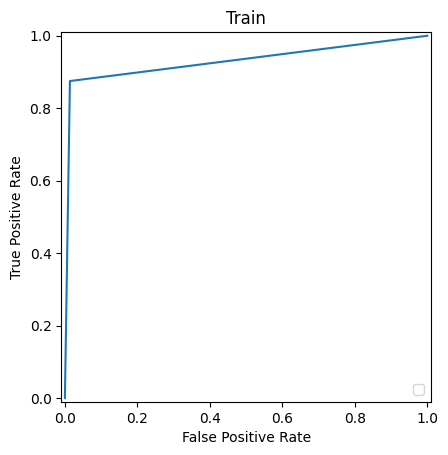

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


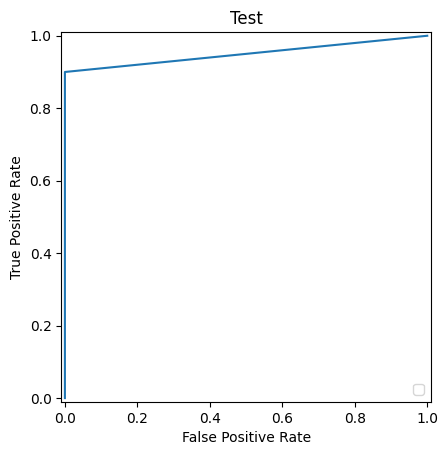

In [6]:
fpr, tpr, _ = roc_curve(y_train, labels)
RocCurveDisplay(fpr=fpr,tpr=tpr).plot()
plt.title("Train")
plt.show()

fpr, tpr, _ = roc_curve(y_test, test_predict)
RocCurveDisplay(fpr=fpr,tpr=tpr).plot()
plt.title("Test")
plt.show()

In [50]:
#ex 3
x_train, x_test, y_train, y_test = po.utils.data.generate_data(n_train=1000, n_test=0, n_features=1, contamination=0.1,random_state = 70)
#print(x_train)
#print(y_train)
zscores = zscore(x_train)
#threshold = np.quantile(zscores, 0.95)
#normal am fi luat doua threshold uri doar ca aici imi genereaza doar valori mai mici
threshold1 = np.quantile(zscores, 0.10)
#print(threshold1)
threshold2 = np.quantile(zscores, 0.95)
#print(threshold2)

zscorespredict = np.array([])

for z in zscores:
  #if z >= threshold:
  if z <= threshold1: #or z >= threshold2:
    zscorespredict = np.append(zscorespredict, 1)
  else:
    zscorespredict = np.append(zscorespredict, 0)

#print(zscorespredict)
#zscore(x_train)
balanced_accuracy_score(y_train, zscorespredict)

np.float64(0.9388888888888889)

In [49]:
np.random.seed(67)
n_outliers = 100
n_inliers = 900
n_features = 3

mu = np.array([2.0, -1.0, 0.5])
Sigma = np.array([
    [1.0, 0.5, 0.3],
    [0.5, 2.0, 0.4],
    [0.3, 0.4, 1.5]
])
# cholesky
L = np.linalg.cholesky(Sigma)

x_in = np.random.normal(0, 1, size=(n_inliers, n_features))

x_out = np.random.normal(8, 1, size=(n_outliers, n_features))

# Transform: y = Lx + µ
y_in = x_in.dot(L.T) + mu
y_out = x_out.dot(L.T) + mu


X = np.vstack([y_in, y_out])
#print(X)
Y = np.hstack([np.zeros(n_inliers), np.ones(n_outliers)])
#print(Y)
zscores = zscore(X)
#print(zscores)


z_norm = np.linalg.norm(zscores, axis=1)

threshold = np.quantile(z, 0.9)
#print(threshold)
#la fel trebuia sa luam 2 threshold uri dar avem anomalii doar mai mari

predict = np.array([])

for z in z_norm:
  if z >= threshold:
    predict = np.append(predict, 1)
  else:
    predict = np.append(predict, 0)
#print(predict)

balanced_accuracy_score(Y, predict)

np.float64(0.9299999999999999)